In [1]:
import gc
import numpy as np
import pandas as pd
import back_testing as bt

gc.collect()

0

In [2]:
price_df = pd.read_csv('./data/sp500.csv')
price_df.set_index('datadate', inplace=True)
df_ = price_df[['AAPL', 'DIS', 'XOM', 'INTC', 'MSFT', 'AMZN', 'NVDA', 'CRM', 'GOOGL', 'TSLA']]
df_.index = pd.to_datetime(df_.index, format='%Y-%m-%d')

idx_df = pd.read_csv('./data/GSPC.csv', index_col='Date')
idx_df = idx_df.pct_change().apply(lambda x: np.log1p(x)).dropna()
idx_df.index = pd.to_datetime(idx_df.index, format='%Y-%m-%d')
idx_df.columns = ['S&P 500']

returns = bt.get_momentum(df_, 1)
momentum_12m = bt.get_momentum(df_, 12)
weights = bt.dual_momentum_strategy(momentum_12m)

In [3]:
result_df = pd.DataFrame()
result_df = bt.return_Table(weights, returns, result_df, 'Neutral', True, False, False)
result_df = pd.concat([result_df, idx_df], axis=1)
result_df.to_csv('./general_results/result.csv')

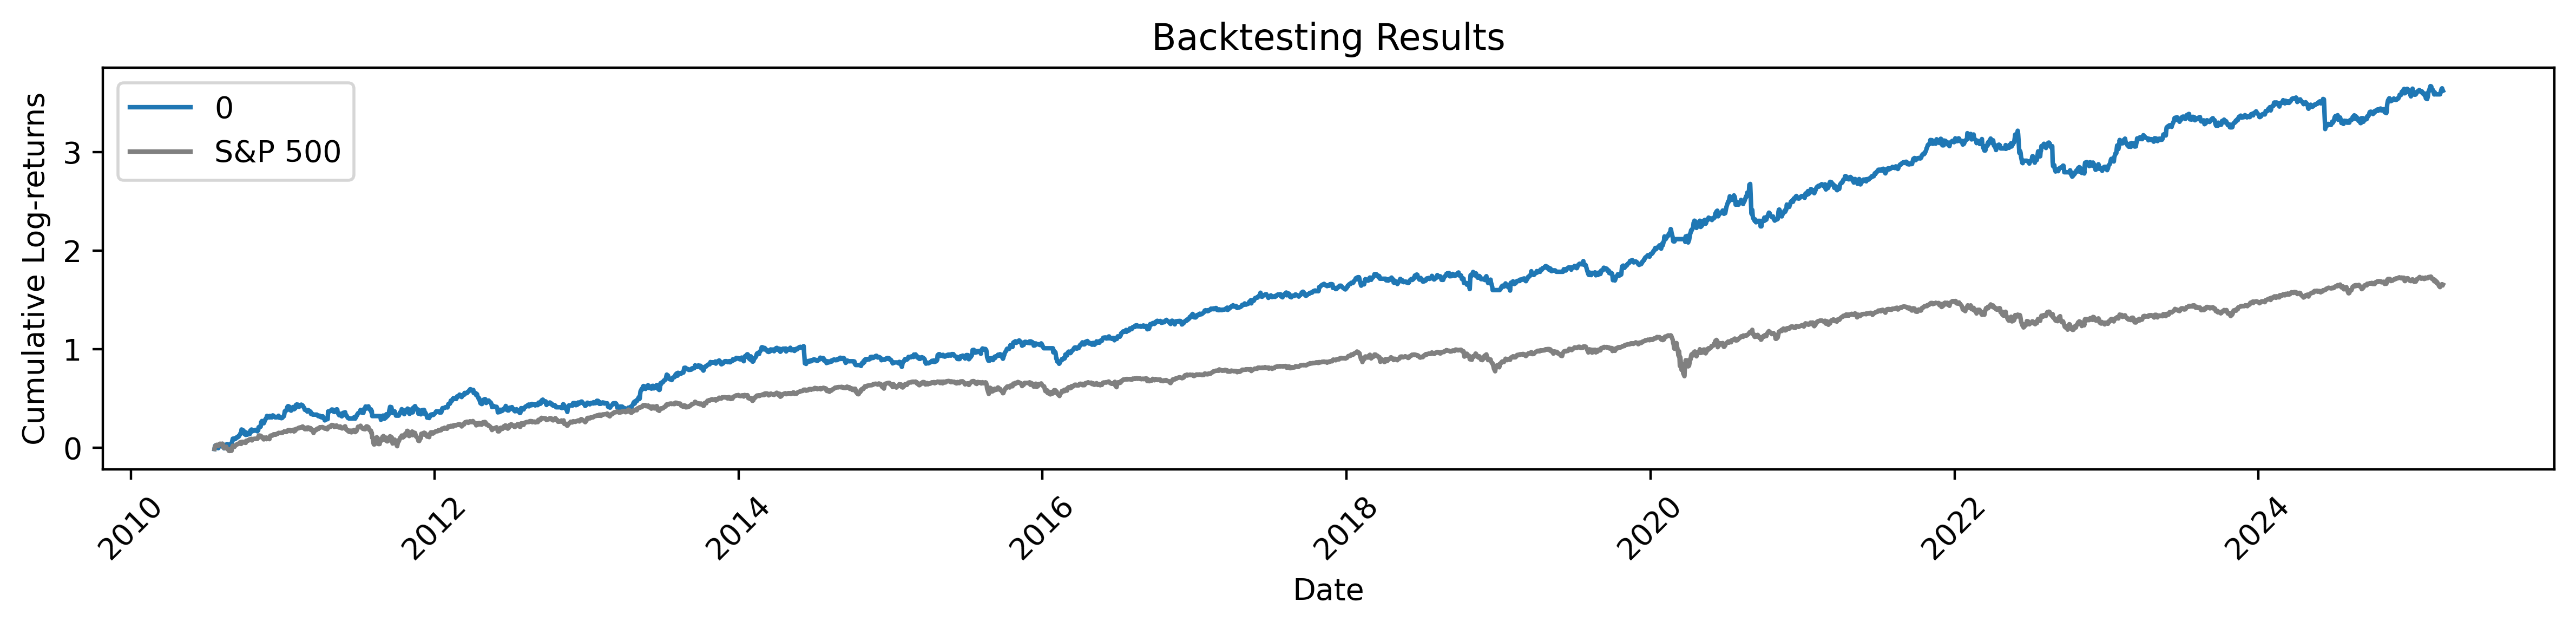

In [4]:
bt.plot_result(result_df, True)

In [5]:
bt.cal_turnover(weights)

'746.72'

In [6]:
metric = bt.METRICS(result_df, result_df.index)
metric.cal_describe()
metric.cal_monthly_statistics()

In [7]:
metric.annual_statistics

,0,S&P 500
count,3690,3690.0
cumulative return,0.011843,0.005393
annualized return mean,0.011843,0.005393
annualized return std,0.059675,0.0381
annualized return downside std,0.057697,0.031539
sharpe ratio,0.198461,0.141538
sortino ratio,0.205262,0.170981
gross profit,21.017443,14.033723
gross loss,-17.397084,-12.379967
profit factor,1.208101,1.133583


In [8]:
metric.monthly_statistics

,0,S&P 500
Mean,0.000981,0.000448
Standard deviation,0.016732,0.010794
Standard error,0.000275,0.000178
t-statistic,3.643055888713146,2.747576632571568
Min,-0.301637,-0.127652
25%,-0.005883,-0.003802
50%,0.000371,0.000661
75%,0.008694,0.005648
Max,0.091369,0.089683
Skew,-4.045517,-0.746711
